In [0]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# set inline plots size
import math
import numpy as np
import time
import os
import cv2
from google.colab.patches import cv2_imshow
import zipfile
import tarfile
from collections import namedtuple
from google.colab.patches import cv2_imshow
from xml.dom import minidom
import pandas as pd
from google.colab import files
import csv

In [0]:
# !git clone 'https://github.com/UralmashFox/CV_Project'
# %cd CV_Project
df1 = pd.read_csv('book.csv', na_values='-', sep = ';') 
df1 = df1.fillna(0)
# !pip install patool
# import patoolib
# patoolib.extract_archive("pngs.rar", outdir="/content")


In [524]:
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [525]:
text = "It was Sunny day and Jenny and Mike were happy sitting in the park. THe decided to play with a ball. Also the took their dog"
sentances = tokenize.sent_tokenize(text)
print (sentances)

['It was Sunny day and Jenny and Mike were happy sitting in the park.', 'THe decided to play with a ball.', 'Also the took their dog']


In [526]:
i = 0
BoW = []
all_BoW = []
for sentance in sentances:
  words = sentance.split()
  BoW = []
  for word in words:
    word = word.lower()
    word = word.replace('.', '')
    word = word.replace('!', '')
    word = word.replace(',', '')
    word = word.replace('-', '')
    word = word.replace(':', '')
    BoW.append(word)
  all_BoW.append(BoW)
print(all_BoW)

[['it', 'was', 'sunny', 'day', 'and', 'jenny', 'and', 'mike', 'were', 'happy', 'sitting', 'in', 'the', 'park'], ['the', 'decided', 'to', 'play', 'with', 'a', 'ball'], ['also', 'the', 'took', 'their', 'dog']]


In [527]:
obj = df1.obj
code = df1.code
flip = df1.flip
axis_x = df1.x
axis_y = df1.y
all_ID = []
true_ID = []
all_flip = []
all_y = []
all_x = []

for BoW in all_BoW:
  num = 0
  val = 0
  ID = []
  y = []
  x = []
  flips = []
  for word in BoW:
    for index, row in enumerate(obj):
      if word == row:
        try:
          val = int(code[index])
          num = num+val
        except:
          ID.append(code[index])
          flips.append(flip[index])
          try:
            x.append(float(axis_x[index].replace(',', '.')))
            y.append(float(axis_y[index].replace(',', '.')))
          except:
            if isinstance(axis_x[index], int):x.append(axis_x[index])
            if isinstance(axis_y[index], int):y.append(axis_y[index])
  ID.append(num)
  all_x.append(x)
  all_y.append(y)
  all_ID.append(ID)
  all_flip.append(flips)
print(all_ID)
print(all_flip)
print(all_x)
print(all_y)

[['s_3s', 's_3s', 'hb1', 'hb0', 'p_8s', 21], ['t_2s', 0], ['a_2s', 0]]
[[0.0, 0.0, 1.0, 0.0, 0.0], [0.0], [0.0]]
[[0.25, 0.0, 0.67, 0.0, 0.33], [0.2], [0.1]]
[[0.0, 0.0, 0.25, 0.25, 0.25], [0.25], [0.7]]


In [528]:
trueID = []
for IDs in all_ID:
  ident = []
  for id in IDs:
    if (id == 'hb0') or (id == 'hb1'):
      true_id = str(id) + '_' + str(IDs[len(IDs)-1]) + 's'
      ident.append(true_id)
    elif not isinstance(id, int):
      true_id = id
      ident.append(true_id)
  trueID.append(ident)
print(trueID)

[['s_3s', 's_3s', 'hb1_21s', 'hb0_21s', 'p_8s'], ['t_2s'], ['a_2s']]


In [0]:
def to_background(image, x,y):
  hi, wi, ci = image.shape
  hb, wb, cb = background.shape
  for w in range(0, wi):
    for h in range (0, hi):
      if not (image[h][w][3] == 0 ):
        background[int(h+hb*y), int(x*wb+w)] = image[h][w]
  return(background)

In [0]:
def to_one_array(images, flips, all_x, all_y):
  back_i = []
  back_f = []
  back_x = []
  back_y = []

  for image in images:
    for img in image:
      back_i.append(img)
  for flip in flips:
    for flp in flip:
      back_f.append(flp)
  for X in all_x:
    for x in X:
      back_x.append(x)
  for Y in all_y:
    for y in Y:
      back_y.append(y)
  return(back_i, back_f, back_x, back_y)

['s_3s', 's_3s', 'hb1_21s', 'hb0_21s', 'p_8s', 't_2s', 'a_2s'] [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] [0.25, 0.0, 0.67, 0.0, 0.33, 0.2, 0.1] [0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.7]


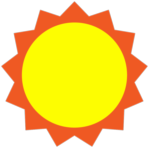

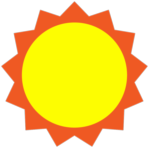

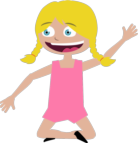

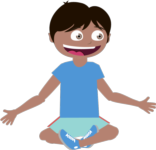

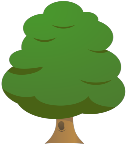

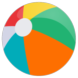

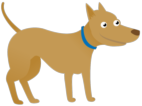

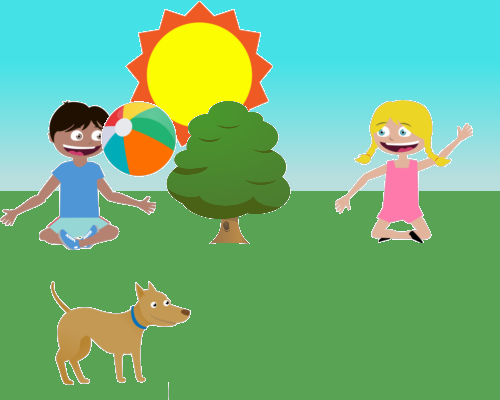

In [531]:
background =  cv2.imread('background.png', cv2.IMREAD_UNCHANGED)
images, flips, x, y = to_one_array(trueID, all_flip, all_x, all_y)
print(images, flips, x, y)
for IMG in images:
  img = IMG + '.png'
  image = cv2.imread(img, cv2.IMREAD_UNCHANGED)
  if flips[images.index(IMG)]:
    image = cv2.flip(image, 1)
  try:
    final_img = to_background(image, x[images.index(IMG)], y[images.index(IMG)])
  except:
    image = cv2.resize(image, (int(image.shape[0]/4), int(image.shape[1]/2)))
    final_img = to_background(image, x[images.index(IMG)], y[images.index(IMG)])
  cv2_imshow(image)
cv2_imshow(final_img)